## GoFundMe Campaign Success Analysis

#### Use Selenium library to scrape data from GoFundMe in the categories in NJ Area.

The data that will be extracted includes Campaign title, Category, Current funding amount, and Funding goal. Data scraping is used for learning purposes only and the names of the campaign makers will not be extracted. Once the data is extracted into a Python list, the list will be converted into a Pandas DataFrame for Exploratory Data Analysis (EDA). 

**Are there geological trends that impact the success of GoFundMe campaigns and what are the factors that lead to a successful campaign?**

#### The Process

1.) Scrape 1000 data entries of the most recent ongoing campaigns near me using the Selenium Library.

2.) Load scraped data into Pandas DataFrame.

3.) Perform EDA to understand the structure of the scraped campaign data.

4.) Perform Data Wrangling procedures on scraped data.

5.) Incorporate municipality population, tax assessment, income, and employment rate that have been organized by Excel -> convert to CSV files.

5.) Merge the datasets.

6.) Perform Ad-Hoc analysis with data visualization to answer the main question: Are geological trends impacting the success of GoFundMe campaigns? What are the key factors that lead to a successful campaign? 

7.) Store the finalized dataset in a MySQL database.



#### 1.) Scrape campaign data using Selenium

In [21]:
#import the necessary libraries:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import selenium

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver import ActionChains, Keys
import time
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.window import WindowTypes

In [50]:
options = Options()
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3")

fundme_campaigns = [] #list to store campaign information

#the url page in question:
url_page = "https://www.gofundme.com/s?location-lat=40.57870&location-lng=-74.22920&location-description=Carteret"

#options.add_argument("--headless=new")
driver = webdriver.Chrome(options=options)
driver.get(url_page)
wait = WebDriverWait(driver, 30)  # Wait up to 30 seconds for all elements in the website to load

#counter= 48

load_more = driver.find_element(By.CSS_SELECTOR, "div.hrt-disp-flex.hrt-justify-center.state-results_buttonWrapper__8XS__")
i=1
while load_more:  # Adjust the range as needed
    
    if i == 48:
        
        i = 0  # Reset i, indicating we are at a new page with new elements starting at 0 again.
        time.sleep(10)
        load_more = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, "div.hrt-disp-flex.hrt-justify-center.state-results_buttonWrapper__8XS__")))
        load_more.click()
        time.sleep(10)
        
    else:
        
        time.sleep(2)
        elements = driver.find_elements(By.CSS_SELECTOR, "div.full-state-list-card_mediaCardImage__edpE8")
        driver.execute_script("arguments[0].scrollIntoView();", elements[i])
        time.sleep(2)
        
        # Locate the element using the class names and extract the href attribute

        xpath = f"//*[@id='search-list']/li[{i}]/a"
        campaign_element = elements[i].find_element(By.XPATH, xpath)
        campaign_url = campaign_element.get_attribute("href")
       
        # Open campaign in a new tab using the extracted URL
        
        driver.switch_to.new_window(WindowTypes.TAB)
        driver.get(campaign_url)
        time.sleep(5)

        # Elements to extract
        
        campaign_title = driver.find_element(By.CSS_SELECTOR, "header.p-campaign-header")
        time.sleep(2)
        funds = driver.find_element(By.CSS_SELECTOR, "div.progress-meter_progressMeter__BYOlt")
        time.sleep(2)
        category = driver.find_element(By.CSS_SELECTOR, "a.hrt-disp-flex.hrt-align-center.hrt-link.hrt-link--gray-dark")
        time.sleep(2)
        date = driver.find_element(By.CSS_SELECTOR, "span.m-campaign-byline-created.a-created-date")

        location = WebDriverWait(driver, 20).until(
            EC.visibility_of_element_located((By.CSS_SELECTOR, "div.hrt-mt-3.hrt-mb-5.campaign-members-main_campaignMembersMain__mmNDj"))
        )

        # Append the text found into the fundme_campaigns list
        
        fundme_campaigns.append([campaign_title.text, funds.text, date.text, category.text, location.text])

        # Close the tab and switch back to the main page
        
        driver.close()
        driver.switch_to.window(driver.window_handles[0])
        time.sleep(2)
    
    i += 1  # Increment the counter

print("Number of elements found: ", len(elements))

driver.close()

WebDriverException: Message: unknown error: net::ERR_INTERNET_DISCONNECTED
  (Session info: chrome=128.0.6613.120)
Stacktrace:
	GetHandleVerifier [0x00007FF6F7B1B5D2+29090]
	(No symbol) [0x00007FF6F7A8E689]
	(No symbol) [0x00007FF6F794B1CA]
	(No symbol) [0x00007FF6F7943204]
	(No symbol) [0x00007FF6F7934179]
	(No symbol) [0x00007FF6F7935F42]
	(No symbol) [0x00007FF6F793443F]
	(No symbol) [0x00007FF6F7933CD1]
	(No symbol) [0x00007FF6F7933C10]
	(No symbol) [0x00007FF6F7931AD3]
	(No symbol) [0x00007FF6F793214C]
	(No symbol) [0x00007FF6F794E231]
	(No symbol) [0x00007FF6F79E73FE]
	(No symbol) [0x00007FF6F79C66EA]
	(No symbol) [0x00007FF6F79E65D9]
	(No symbol) [0x00007FF6F79C6493]
	(No symbol) [0x00007FF6F79909B1]
	(No symbol) [0x00007FF6F7991B11]
	GetHandleVerifier [0x00007FF6F7E38C5D+3295277]
	GetHandleVerifier [0x00007FF6F7E84843+3605523]
	GetHandleVerifier [0x00007FF6F7E7A707+3564247]
	GetHandleVerifier [0x00007FF6F7BD6EB6+797318]
	(No symbol) [0x00007FF6F7A9980F]
	(No symbol) [0x00007FF6F7A953F4]
	(No symbol) [0x00007FF6F7A95580]
	(No symbol) [0x00007FF6F7A84A1F]
	BaseThreadInitThunk [0x00007FFBFF1B257D+29]
	RtlUserThreadStart [0x00007FFBFFD4AF28+40]


In [72]:
print(len(fundme_campaigns)) #check how many campaignswere scraped

915


In [73]:
print(i)

23


In [2]:
fundme_campaigns

#### 2.) Load scraped campaign data into Pandas DataFrame and perform EDA

Convert the following list "fundme_campaigns" into a Pandas DataFrame with the columns: Campaign title, Money raised, Date created, and Category.

In [75]:
campaigns_df = pd.DataFrame(fundme_campaigns, columns=['Campaign title', 'Money raised', 'Date created', 'Category', 'Location'])
campaigns_df

,Campaign title,Money raised,Date created,Category,Location
0,Financial Support for Eden Yerushalmi's Mom an...,"Fundraiser progress\n$203,786 raised of $250,0...",Created 5 d ago,Other,"O Caspi\nOrganizer\nBrooklyn, NY\nContact"
1,Help to Free American Hostage Omer Neutra,"Fundraiser progress\n$117,915 raised of $250,0...",Created 3 d ago,Emergencies,"orna Neutra\nOrganizer\nPlainview, NY\nContact"
2,Support Salome's Road to Recovery,"Fundraiser progress\n$51,236 raised of $40,000...","Created August 30th, 2024",Medical,"Juliana Castaño\nOrganizer\nEnglewood, NJ\nCon..."
3,Support Michal Lobanov whose husband Alex was ...,"Fundraiser progress\n$79,790 raised of $150,00...","Created June 23rd, 2024",Community,"Hope Is Mandatory\nOrganizer\nEnglewood, NJ\nC..."
4,Donate to Help Support Nicholas's Road to Reco...,"Fundraiser progress\n$41,713 raised of $50,000...",Created 4 d ago,Family,"Sofia Fiorita\nOrganizer\nLittle Falls, NJ\nCo..."
...,...,...,...,...,...
910,Support Sophia Prieto's Fight Against Leukemia,"Fundraiser progress\n$9,600 raised of $10,000 ...","Created June 25th, 2024",Medical,"Refat Kazi\nOrganizer\nAstoria, NY\nMauricio P..."
911,Help Brooklyn Family Rebuild After Fire,"Fundraiser progress\n$3,005 raised of $5,000 g...","Created August 27th, 2024",Family,"Stephanie Marie\nOrganizer\nBrooklyn, NY\nContact"
912,Help Shahd leave Gaza and continue her studies,"Fundraiser progress\n$1,192 raised of $5,000 g...","Created July 28th, 2024",Education,"Shahd Manssor\nOrganizer\nFreehold, NJ\nMichel..."
913,Help Jim Pequeen Battle Stage 4 Lung Cancer,"Fundraiser progress\n$7,470 raised of $10,000 ...","Created August 8th, 2024",Medical,"Lavallette School PTO\nOrganizer\nLavallette, ..."


In [76]:
campaigns_df.head()

,Campaign title,Money raised,Date created,Category,Location
0,Financial Support for Eden Yerushalmi's Mom an...,"Fundraiser progress\n$203,786 raised of $250,0...",Created 5 d ago,Other,"O Caspi\nOrganizer\nBrooklyn, NY\nContact"
1,Help to Free American Hostage Omer Neutra,"Fundraiser progress\n$117,915 raised of $250,0...",Created 3 d ago,Emergencies,"orna Neutra\nOrganizer\nPlainview, NY\nContact"
2,Support Salome's Road to Recovery,"Fundraiser progress\n$51,236 raised of $40,000...","Created August 30th, 2024",Medical,"Juliana Castaño\nOrganizer\nEnglewood, NJ\nCon..."
3,Support Michal Lobanov whose husband Alex was ...,"Fundraiser progress\n$79,790 raised of $150,00...","Created June 23rd, 2024",Community,"Hope Is Mandatory\nOrganizer\nEnglewood, NJ\nC..."
4,Donate to Help Support Nicholas's Road to Reco...,"Fundraiser progress\n$41,713 raised of $50,000...",Created 4 d ago,Family,"Sofia Fiorita\nOrganizer\nLittle Falls, NJ\nCo..."


In [77]:
campaigns_df.tail()

,Campaign title,Money raised,Date created,Category,Location
910,Support Sophia Prieto's Fight Against Leukemia,"Fundraiser progress\n$9,600 raised of $10,000 ...","Created June 25th, 2024",Medical,"Refat Kazi\nOrganizer\nAstoria, NY\nMauricio P..."
911,Help Brooklyn Family Rebuild After Fire,"Fundraiser progress\n$3,005 raised of $5,000 g...","Created August 27th, 2024",Family,"Stephanie Marie\nOrganizer\nBrooklyn, NY\nContact"
912,Help Shahd leave Gaza and continue her studies,"Fundraiser progress\n$1,192 raised of $5,000 g...","Created July 28th, 2024",Education,"Shahd Manssor\nOrganizer\nFreehold, NJ\nMichel..."
913,Help Jim Pequeen Battle Stage 4 Lung Cancer,"Fundraiser progress\n$7,470 raised of $10,000 ...","Created August 8th, 2024",Medical,"Lavallette School PTO\nOrganizer\nLavallette, ..."
914,Support Recovery and Stability for a Black Dis...,"Fundraiser progress\n$4,705 raised of $10,000 ...","Created July 24th, 2024","Rent, Food & Monthly Bills","Jesi Taylor\nOrganizer\nBrooklyn, NY\nContact"


In [78]:
campaigns_df.shape

(915, 5)

In [79]:
campaigns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Campaign title  915 non-null    object
 1   Money raised    915 non-null    object
 2   Date created    915 non-null    object
 3   Category        915 non-null    object
 4   Location        915 non-null    object
dtypes: object(5)
memory usage: 35.9+ KB


In [80]:
campaigns_df.isnull().sum()

Campaign title    0
Money raised      0
Date created      0
Category          0
Location          0
dtype: int64

#### 3.) Perform Data Wrangling:

- Create separate columns for Money raised, Funding goal, and Donations

- Improve formatting for the Money raised, Location, and Date created column with necessary string functions

- Convert the units in Money raised and Funding goal object to float

- Convert the Donations column from object to int

- Create a new column called "Percent funded" to illustrate funding progress for an ongoing campaign

- Create a boolean column called "Campaign funded" to indicate a successful campaign or not



In [81]:
#extract information of fund goal and donations with string functions
fund_goal = campaigns_df['Money raised'].str.split(' raised of ').str[1].str.split(' ').str[0]
donations = campaigns_df['Money raised'].str.split('\n').str[2].str.split(' donations').str[0]


#create new dataframe columns with the information from money raised col.
campaigns_df['Funding goal'] = fund_goal
campaigns_df['Donations'] = donations

In [82]:
campaigns_df

,Campaign title,Money raised,Date created,Category,Location,Funding goal,Donations
0,Financial Support for Eden Yerushalmi's Mom an...,"Fundraiser progress\n$203,786 raised of $250,0...",Created 5 d ago,Other,"O Caspi\nOrganizer\nBrooklyn, NY\nContact","$250,000",2.9K
1,Help to Free American Hostage Omer Neutra,"Fundraiser progress\n$117,915 raised of $250,0...",Created 3 d ago,Emergencies,"orna Neutra\nOrganizer\nPlainview, NY\nContact","$250,000",885
2,Support Salome's Road to Recovery,"Fundraiser progress\n$51,236 raised of $40,000...","Created August 30th, 2024",Medical,"Juliana Castaño\nOrganizer\nEnglewood, NJ\nCon...","$40,000",1.1K
3,Support Michal Lobanov whose husband Alex was ...,"Fundraiser progress\n$79,790 raised of $150,00...","Created June 23rd, 2024",Community,"Hope Is Mandatory\nOrganizer\nEnglewood, NJ\nC...","$150,000",1.1K
4,Donate to Help Support Nicholas's Road to Reco...,"Fundraiser progress\n$41,713 raised of $50,000...",Created 4 d ago,Family,"Sofia Fiorita\nOrganizer\nLittle Falls, NJ\nCo...","$50,000",605
...,...,...,...,...,...,...,...
910,Support Sophia Prieto's Fight Against Leukemia,"Fundraiser progress\n$9,600 raised of $10,000 ...","Created June 25th, 2024",Medical,"Refat Kazi\nOrganizer\nAstoria, NY\nMauricio P...","$10,000",103
911,Help Brooklyn Family Rebuild After Fire,"Fundraiser progress\n$3,005 raised of $5,000 g...","Created August 27th, 2024",Family,"Stephanie Marie\nOrganizer\nBrooklyn, NY\nContact","$5,000",45
912,Help Shahd leave Gaza and continue her studies,"Fundraiser progress\n$1,192 raised of $5,000 g...","Created July 28th, 2024",Education,"Shahd Manssor\nOrganizer\nFreehold, NJ\nMichel...","$5,000",45
913,Help Jim Pequeen Battle Stage 4 Lung Cancer,"Fundraiser progress\n$7,470 raised of $10,000 ...","Created August 8th, 2024",Medical,"Lavallette School PTO\nOrganizer\nLavallette, ...","$10,000",102


In [105]:
#fixing days
from datetime import date, datetime, timedelta

def month_to_number(month_name):
    
    datetime_object = datetime.strptime(month_name, '%B')
        
    return datetime_object.month
    
def convert_day(x):
    if ' d ago' in x:
        x = x.replace(' d ago', '')
        x = x.replace('Created ', '')
        
        return date.today() - timedelta(days=int(x))
    
    elif ' hrs ago' in x:
        x = x.replace('Created ', '')
        x = x.replace(' hrs ago', '')
        
        return date.today() - timedelta(hours=int(x))

    elif ' hr ago' in x:
        x = x.replace('Created ', '')
        x = x.replace(' hr ago', '')

        x = date.today()
    

    elif 'Just now' in x:
        x = x.replace('just now', '')
        x = date.today()
        return x
        
    else:
        x = x.replace('Created ', '')
        x = x.replace(',', '')
        endings = ['nd', 'rd', 'th']
        
        for i in endings:
            x = x.replace(i, '')

        x = x.split(' ')
        
        if 'st' in x[1]:
            x[1] = x[1].replace('st', '')

        x =  x[2] + '-' + str(month_to_number(x[0])) + '-' + x[1] 


        return datetime.strptime(x, '%Y-%m-%d')

    
#apply the function to fix creation dates:
campaigns_df['Date created'] = campaigns_df['Date created'].apply(convert_day)


August 30 2024
2024-8-30
June 23 2024
2024-6-23
August 3 2024
2024-8-3
June 5 2022
2022-6-5
March 30 2021
2021-3-30
December 10 2021
2021-12-10
August 15 2024
2024-8-15
August 30 2024
2024-8-30
July 18 2024
2024-7-18
August 29 2024
2024-8-29
August 30 2024
2024-8-30
September 2 2024
2024-9-2
July 29 2024
2024-7-29
September 1st 2024
2024-9-1
August 9 2024
2024-8-9
August 25 2024
2024-8-25
July 20 2024
2024-7-20
August 16 2024
2024-8-16
August 11 2024
2024-8-11
August 28 2024
2024-8-28
August 28 2024
2024-8-28
September 2 2024
2024-9-2
June 28 2024
2024-6-28
August 13 2024
2024-8-13
July 28 2024
2024-7-28
September 1st 2024
2024-9-1
September 1st 2024
2024-9-1
August 19 2024
2024-8-19
August 7 2024
2024-8-7
September 2 2024
2024-9-2
September 1st 2024
2024-9-1
August 24 2024
2024-8-24
September 1st 2024
2024-9-1
September 1st 2024
2024-9-1
September 1st 2024
2024-9-1
August 6 2024
2024-8-6
August 26 2024
2024-8-26
August 28 2024
2024-8-28
July 20 2024
2024-7-20
July 2 2024
2024-7-2
Sept

In [106]:
campaigns_df['Date created'] = pd.to_datetime(campaigns_df['Date created'])

In [107]:
campaigns_df

,Campaign title,Money raised,Date created,Category,Location,Funding goal,Donations
0,Financial Support for Eden Yerushalmi's Mom an...,"Fundraiser progress\n$203,786 raised of $250,0...",2024-09-05,Other,"O Caspi\nOrganizer\nBrooklyn, NY\nContact","$250,000",2.9K
1,Help to Free American Hostage Omer Neutra,"Fundraiser progress\n$117,915 raised of $250,0...",2024-09-07,Emergencies,"orna Neutra\nOrganizer\nPlainview, NY\nContact","$250,000",885
2,Support Salome's Road to Recovery,"Fundraiser progress\n$51,236 raised of $40,000...",2024-08-30,Medical,"Juliana Castaño\nOrganizer\nEnglewood, NJ\nCon...","$40,000",1.1K
3,Support Michal Lobanov whose husband Alex was ...,"Fundraiser progress\n$79,790 raised of $150,00...",2024-06-23,Community,"Hope Is Mandatory\nOrganizer\nEnglewood, NJ\nC...","$150,000",1.1K
4,Donate to Help Support Nicholas's Road to Reco...,"Fundraiser progress\n$41,713 raised of $50,000...",2024-09-06,Family,"Sofia Fiorita\nOrganizer\nLittle Falls, NJ\nCo...","$50,000",605
...,...,...,...,...,...,...,...
910,Support Sophia Prieto's Fight Against Leukemia,"Fundraiser progress\n$9,600 raised of $10,000 ...",2024-06-25,Medical,"Refat Kazi\nOrganizer\nAstoria, NY\nMauricio P...","$10,000",103
911,Help Brooklyn Family Rebuild After Fire,"Fundraiser progress\n$3,005 raised of $5,000 g...",2024-08-27,Family,"Stephanie Marie\nOrganizer\nBrooklyn, NY\nContact","$5,000",45
912,Help Shahd leave Gaza and continue her studies,"Fundraiser progress\n$1,192 raised of $5,000 g...",2024-07-28,Education,"Shahd Manssor\nOrganizer\nFreehold, NJ\nMichel...","$5,000",45
913,Help Jim Pequeen Battle Stage 4 Lung Cancer,"Fundraiser progress\n$7,470 raised of $10,000 ...",2024-08-08,Medical,"Lavallette School PTO\nOrganizer\nLavallette, ...","$10,000",102


In [108]:
#rearrange columns:
campaigns_df = campaigns_df[['Campaign title', 'Money raised', 'Funding goal', 'Donations', 'Date created', 'Category', 'Location']]

In [110]:
#fix formatting for money raised column (remove other information)
campaigns_df['Money raised'] = campaigns_df['Money raised'].str.split(' raised of ').str[0].str.split('\n').str[1]
campaigns_df

,Campaign title,Money raised,Funding goal,Donations,Date created,Category,Location
0,Financial Support for Eden Yerushalmi's Mom an...,"$203,786","$250,000",2.9K,2024-09-05,Other,"O Caspi\nOrganizer\nBrooklyn, NY\nContact"
1,Help to Free American Hostage Omer Neutra,"$117,915","$250,000",885,2024-09-07,Emergencies,"orna Neutra\nOrganizer\nPlainview, NY\nContact"
2,Support Salome's Road to Recovery,"$51,236","$40,000",1.1K,2024-08-30,Medical,"Juliana Castaño\nOrganizer\nEnglewood, NJ\nCon..."
3,Support Michal Lobanov whose husband Alex was ...,"$79,790","$150,000",1.1K,2024-06-23,Community,"Hope Is Mandatory\nOrganizer\nEnglewood, NJ\nC..."
4,Donate to Help Support Nicholas's Road to Reco...,"$41,713","$50,000",605,2024-09-06,Family,"Sofia Fiorita\nOrganizer\nLittle Falls, NJ\nCo..."
...,...,...,...,...,...,...,...
910,Support Sophia Prieto's Fight Against Leukemia,"$9,600","$10,000",103,2024-06-25,Medical,"Refat Kazi\nOrganizer\nAstoria, NY\nMauricio P..."
911,Help Brooklyn Family Rebuild After Fire,"$3,005","$5,000",45,2024-08-27,Family,"Stephanie Marie\nOrganizer\nBrooklyn, NY\nContact"
912,Help Shahd leave Gaza and continue her studies,"$1,192","$5,000",45,2024-07-28,Education,"Shahd Manssor\nOrganizer\nFreehold, NJ\nMichel..."
913,Help Jim Pequeen Battle Stage 4 Lung Cancer,"$7,470","$10,000",102,2024-08-08,Medical,"Lavallette School PTO\nOrganizer\nLavallette, ..."


In [111]:
#Remove dollar signs in Money raised and Funding goal and convert to float values:

campaigns_df['Money raised'] = campaigns_df['Money raised'].str.replace('$', '')
campaigns_df['Money raised'] = campaigns_df['Money raised'].str.replace(',', '')

campaigns_df['Funding goal'] = campaigns_df['Funding goal'].str.replace('$', '')
campaigns_df['Funding goal'] = campaigns_df['Funding goal'].str.replace(',', '')

campaigns_df['Money raised'] = campaigns_df['Money raised'].astype(float)
campaigns_df['Funding goal'] = campaigns_df['Funding goal'].astype(float)

campaigns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Campaign title  915 non-null    object        
 1   Money raised    915 non-null    float64       
 2   Funding goal    915 non-null    float64       
 3   Donations       915 non-null    object        
 4   Date created    914 non-null    datetime64[ns]
 5   Category        915 non-null    object        
 6   Location        915 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 50.2+ KB


In [171]:
def over_percentage(x):
    if x > 100:
        x = 100.00
        return x
    else:
        return x

In [198]:
#Create percent funded and campaign funded columns:

campaigns_df['Percent funded (%)'] = (campaigns_df['Money raised'] / campaigns_df['Funding goal']) * 100
campaigns_df['Percent funded (%)'] = campaigns_df['Percent funded (%)'].apply(over_percentage)
campaigns_df['Percent funded (%)'] = round(campaigns_df['Percent funded (%)'], 2)
campaigns_df['Campaign funded'] = campaigns_df['Percent funded (%)'] >= 100

campaigns_df[['Campaign title', 'Money raised', 'Funding goal', 'Donations', 'Percent funded (%)', 'Campaign funded', 'Date created', 'Category', 'Location']]

,Campaign title,Money raised,Funding goal,Donations,Percent funded (%),Campaign funded,Date created,Category,Location
0,Financial Support for Eden Yerushalmi's Mom an...,203786.0,250000.0,2900,81.51,False,2024-09-05,Other,"O Caspi\nOrganizer\nBrooklyn, NY\nContact"
1,Help to Free American Hostage Omer Neutra,117915.0,250000.0,885,47.17,False,2024-09-07,Emergencies,"orna Neutra\nOrganizer\nPlainview, NY\nContact"
2,Support Salome's Road to Recovery,51236.0,40000.0,1100,100.00,True,2024-08-30,Medical,"Juliana Castaño\nOrganizer\nEnglewood, NJ\nCon..."
3,Support Michal Lobanov whose husband Alex was ...,79790.0,150000.0,1100,53.19,False,2024-06-23,Community,"Hope Is Mandatory\nOrganizer\nEnglewood, NJ\nC..."
4,Donate to Help Support Nicholas's Road to Reco...,41713.0,50000.0,605,83.43,False,2024-09-06,Family,"Sofia Fiorita\nOrganizer\nLittle Falls, NJ\nCo..."
...,...,...,...,...,...,...,...,...,...
910,Support Sophia Prieto's Fight Against Leukemia,9600.0,10000.0,103,96.00,False,2024-06-25,Medical,"Refat Kazi\nOrganizer\nAstoria, NY\nMauricio P..."
911,Help Brooklyn Family Rebuild After Fire,3005.0,5000.0,45,60.10,False,2024-08-27,Family,"Stephanie Marie\nOrganizer\nBrooklyn, NY\nContact"
912,Help Shahd leave Gaza and continue her studies,1192.0,5000.0,45,23.84,False,2024-07-28,Education,"Shahd Manssor\nOrganizer\nFreehold, NJ\nMichel..."
913,Help Jim Pequeen Battle Stage 4 Lung Cancer,7470.0,10000.0,102,74.70,False,2024-08-08,Medical,"Lavallette School PTO\nOrganizer\nLavallette, ..."


In [173]:
#Fix number of donations column to float:
def convert(string_value):
    if 'K' in string_value:
        string_value = string_value.replace('.', '')
        string_value = string_value.replace('K', '')

        if len(string_value) == 2:
            return int(float(string_value) * 100)
        else:
            return int(float(string_value) * 1000)

    else:
        return string_value

campaigns_df['Donations'] = campaigns_df['Donations'].apply(convert)

TypeError: argument of type 'int' is not iterable

In [174]:
campaigns_df['Donations'] = campaigns_df['Donations'].astype(int)
campaigns_df

,Campaign title,Money raised,Funding goal,Donations,Date created,Category,Location,Percent funded (%),Campaign funded
0,Financial Support for Eden Yerushalmi's Mom an...,203786.0,250000.0,2900,2024-09-05,Other,"O Caspi\nOrganizer\nBrooklyn, NY\nContact",81.514400,False
1,Help to Free American Hostage Omer Neutra,117915.0,250000.0,885,2024-09-07,Emergencies,"orna Neutra\nOrganizer\nPlainview, NY\nContact",47.166000,False
2,Support Salome's Road to Recovery,51236.0,40000.0,1100,2024-08-30,Medical,"Juliana Castaño\nOrganizer\nEnglewood, NJ\nCon...",100.000000,True
3,Support Michal Lobanov whose husband Alex was ...,79790.0,150000.0,1100,2024-06-23,Community,"Hope Is Mandatory\nOrganizer\nEnglewood, NJ\nC...",53.193333,False
4,Donate to Help Support Nicholas's Road to Reco...,41713.0,50000.0,605,2024-09-06,Family,"Sofia Fiorita\nOrganizer\nLittle Falls, NJ\nCo...",83.426000,False
...,...,...,...,...,...,...,...,...,...
910,Support Sophia Prieto's Fight Against Leukemia,9600.0,10000.0,103,2024-06-25,Medical,"Refat Kazi\nOrganizer\nAstoria, NY\nMauricio P...",96.000000,False
911,Help Brooklyn Family Rebuild After Fire,3005.0,5000.0,45,2024-08-27,Family,"Stephanie Marie\nOrganizer\nBrooklyn, NY\nContact",60.100000,False
912,Help Shahd leave Gaza and continue her studies,1192.0,5000.0,45,2024-07-28,Education,"Shahd Manssor\nOrganizer\nFreehold, NJ\nMichel...",23.840000,False
913,Help Jim Pequeen Battle Stage 4 Lung Cancer,7470.0,10000.0,102,2024-08-08,Medical,"Lavallette School PTO\nOrganizer\nLavallette, ...",74.700000,False


In [175]:
campaigns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Campaign title      915 non-null    object        
 1   Money raised        915 non-null    float64       
 2   Funding goal        915 non-null    float64       
 3   Donations           915 non-null    int32         
 4   Date created        914 non-null    datetime64[ns]
 5   Category            915 non-null    object        
 6   Location            915 non-null    object        
 7   Percent funded (%)  915 non-null    float64       
 8   Campaign funded     915 non-null    bool          
dtypes: bool(1), datetime64[ns](1), float64(3), int32(1), object(3)
memory usage: 54.6+ KB


#### 4.) Ad-Hoc Analysis with Data Visualization (with extracted campaign data only)

- Understand the statistics (count, mean, std, min, max, etc.) for the amount of money raised by each category (Funding goal):

In [176]:
avg_category_fund_goal = campaigns_df.groupby('Category')['Funding goal'].describe()
avg_category_fund_goal

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Animals,57.0,11123.947368,32732.591894,300.0,2500.0,5000.0,10000.0,250000.0
Business,18.0,39111.111111,29881.902626,3000.0,20000.0,32500.0,50000.0,100000.0
Community,58.0,48397.310345,150172.909750,500.0,2125.0,5750.0,25000.0,850000.0
Competitions,3.0,4333.333333,3055.050463,1000.0,3000.0,5000.0,6000.0,7000.0
Creative,22.0,14559.090909,27967.560445,1000.0,2000.0,6750.0,12000.0,130000.0
Education,42.0,19744.523810,41356.816656,500.0,3000.0,7750.0,16000.0,250000.0
Emergencies,124.0,30007.814516,36338.106488,1200.0,10000.0,20000.0,40630.0,250000.0
Environment,1.0,1200.000000,NaN,1200.0,1200.0,1200.0,1200.0,1200.0
Events,9.0,6922.222222,2890.405585,1000.0,5000.0,7500.0,9000.0,10000.0


- Perform the same calculations, but for money raised instead:

In [177]:
avg_category_money_raised = campaigns_df.groupby('Category')['Money raised'].describe()
avg_category_money_raised

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Animals,57.0,2008.298246,2355.606132,165.0,593.00,1223.0,2500.00,12930.0
Business,18.0,12095.277778,14884.180508,85.0,2549.00,6243.5,13120.25,51423.0
Community,58.0,8357.637931,18138.046779,250.0,1268.75,2446.0,5268.00,108455.0
Competitions,3.0,1297.666667,1057.154829,538.0,694.00,850.0,1677.50,2505.0
Creative,22.0,7005.545455,21762.868195,235.0,696.25,2053.5,2962.50,103893.0
Education,42.0,4273.976190,6035.441441,461.0,883.75,1635.0,3293.75,23768.0
Emergencies,124.0,9400.701613,16536.265268,120.0,1421.50,3623.5,8714.75,117915.0
Environment,1.0,1560.000000,NaN,1560.0,1560.00,1560.0,1560.00,1560.0
Events,9.0,4472.777778,3215.193531,410.0,3185.00,3825.0,5540.00,10970.0


- How many donators are present in each category? Are there more depending on the category?

In [178]:
donator_count_by_cat = campaigns_df.groupby('Category')['Donations'].sum()
donator_count_by_cat

Category
Animals                         2286
Business                        2512
Community                       5779
Competitions                      66
Creative                         897
Education                       2260
Emergencies                    17384
Environment                       30
Events                           379
Faith                             61
Family                         20065
Funerals & Memorials           15488
Medical                        43622
Newlyweds                         21
Non-Profits & Charities         3703
Other                         187743
Rent, Food & Monthly Bills      4102
Sports                           224
Travel                           104
Volunteer                        438
Wishes                            83
Name: Donations, dtype: int32

Text(0, 0.5, 'Number of Donators')

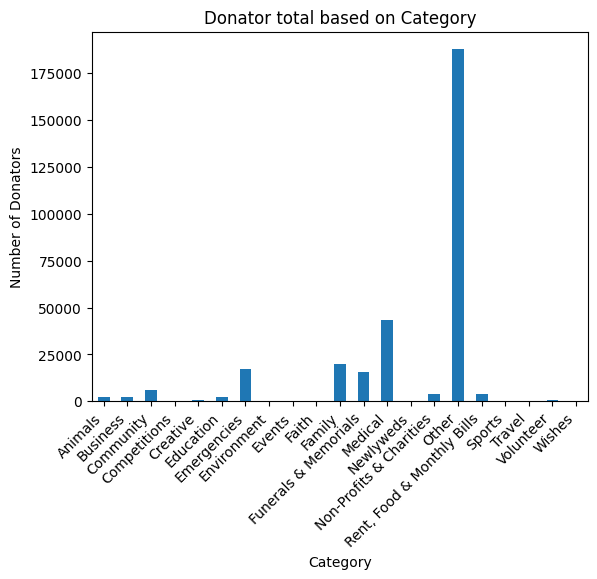

In [179]:
donator_count_by_cat.plot(kind='bar', title= 'Donator total based on Category')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Donators')

#Other category might receive more donators in total because there is a lot more campaign frequency under this category
#- thus more donators may be involved but for different campaigns

- How many campaigns by category are successful (100% or greater)? Please note that this may not be answered completely now, since dates are important to track here. 

In [180]:
#create a df to extract rows that are above 60% success rate:

success_df = campaigns_df[campaigns_df['Percent funded (%)'] >= 100]
success_rate_by_cat = success_df.groupby('Category')['Percent funded (%)'].count()
success_rate_by_cat


Category
Animals                        6
Business                       1
Community                      8
Creative                       2
Education                      4
Emergencies                   14
Environment                    1
Events                         1
Family                        11
Funerals & Memorials          18
Medical                       26
Other                          3
Rent, Food & Monthly Bills     4
Travel                         3
Volunteer                      1
Wishes                         1
Name: Percent funded (%), dtype: int64

- Which categories do these successful campaigns (outliers) belong to?

In [182]:
success_df.nlargest(30, 'Percent funded (%)')['Category'].value_counts()

Category
Funerals & Memorials          6
Emergencies                   6
Medical                       4
Family                        4
Animals                       2
Other                         2
Rent, Food & Monthly Bills    2
Business                      1
Community                     1
Volunteer                     1
Travel                        1
Name: count, dtype: int64

<Axes: title={'center': 'Percentage of Successful Campaigns by Category'}, ylabel='count'>

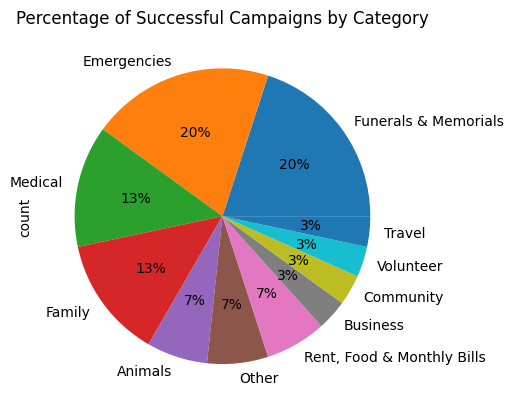

In [183]:
success_df.nlargest(30, 'Percent funded (%)')['Category'].value_counts().plot(kind='pie',autopct='%1.0f%%', title = 'Percentage of Successful Campaigns by Category')

In [184]:
campaigns_df['Campaign funded'].value_counts() #find exactly how many campaigns were successfully funded

Campaign funded
False    811
True     104
Name: count, dtype: int64

<Axes: title={'center': 'Campaigns that reached completion based on Category'}, ylabel='Campaign funded'>

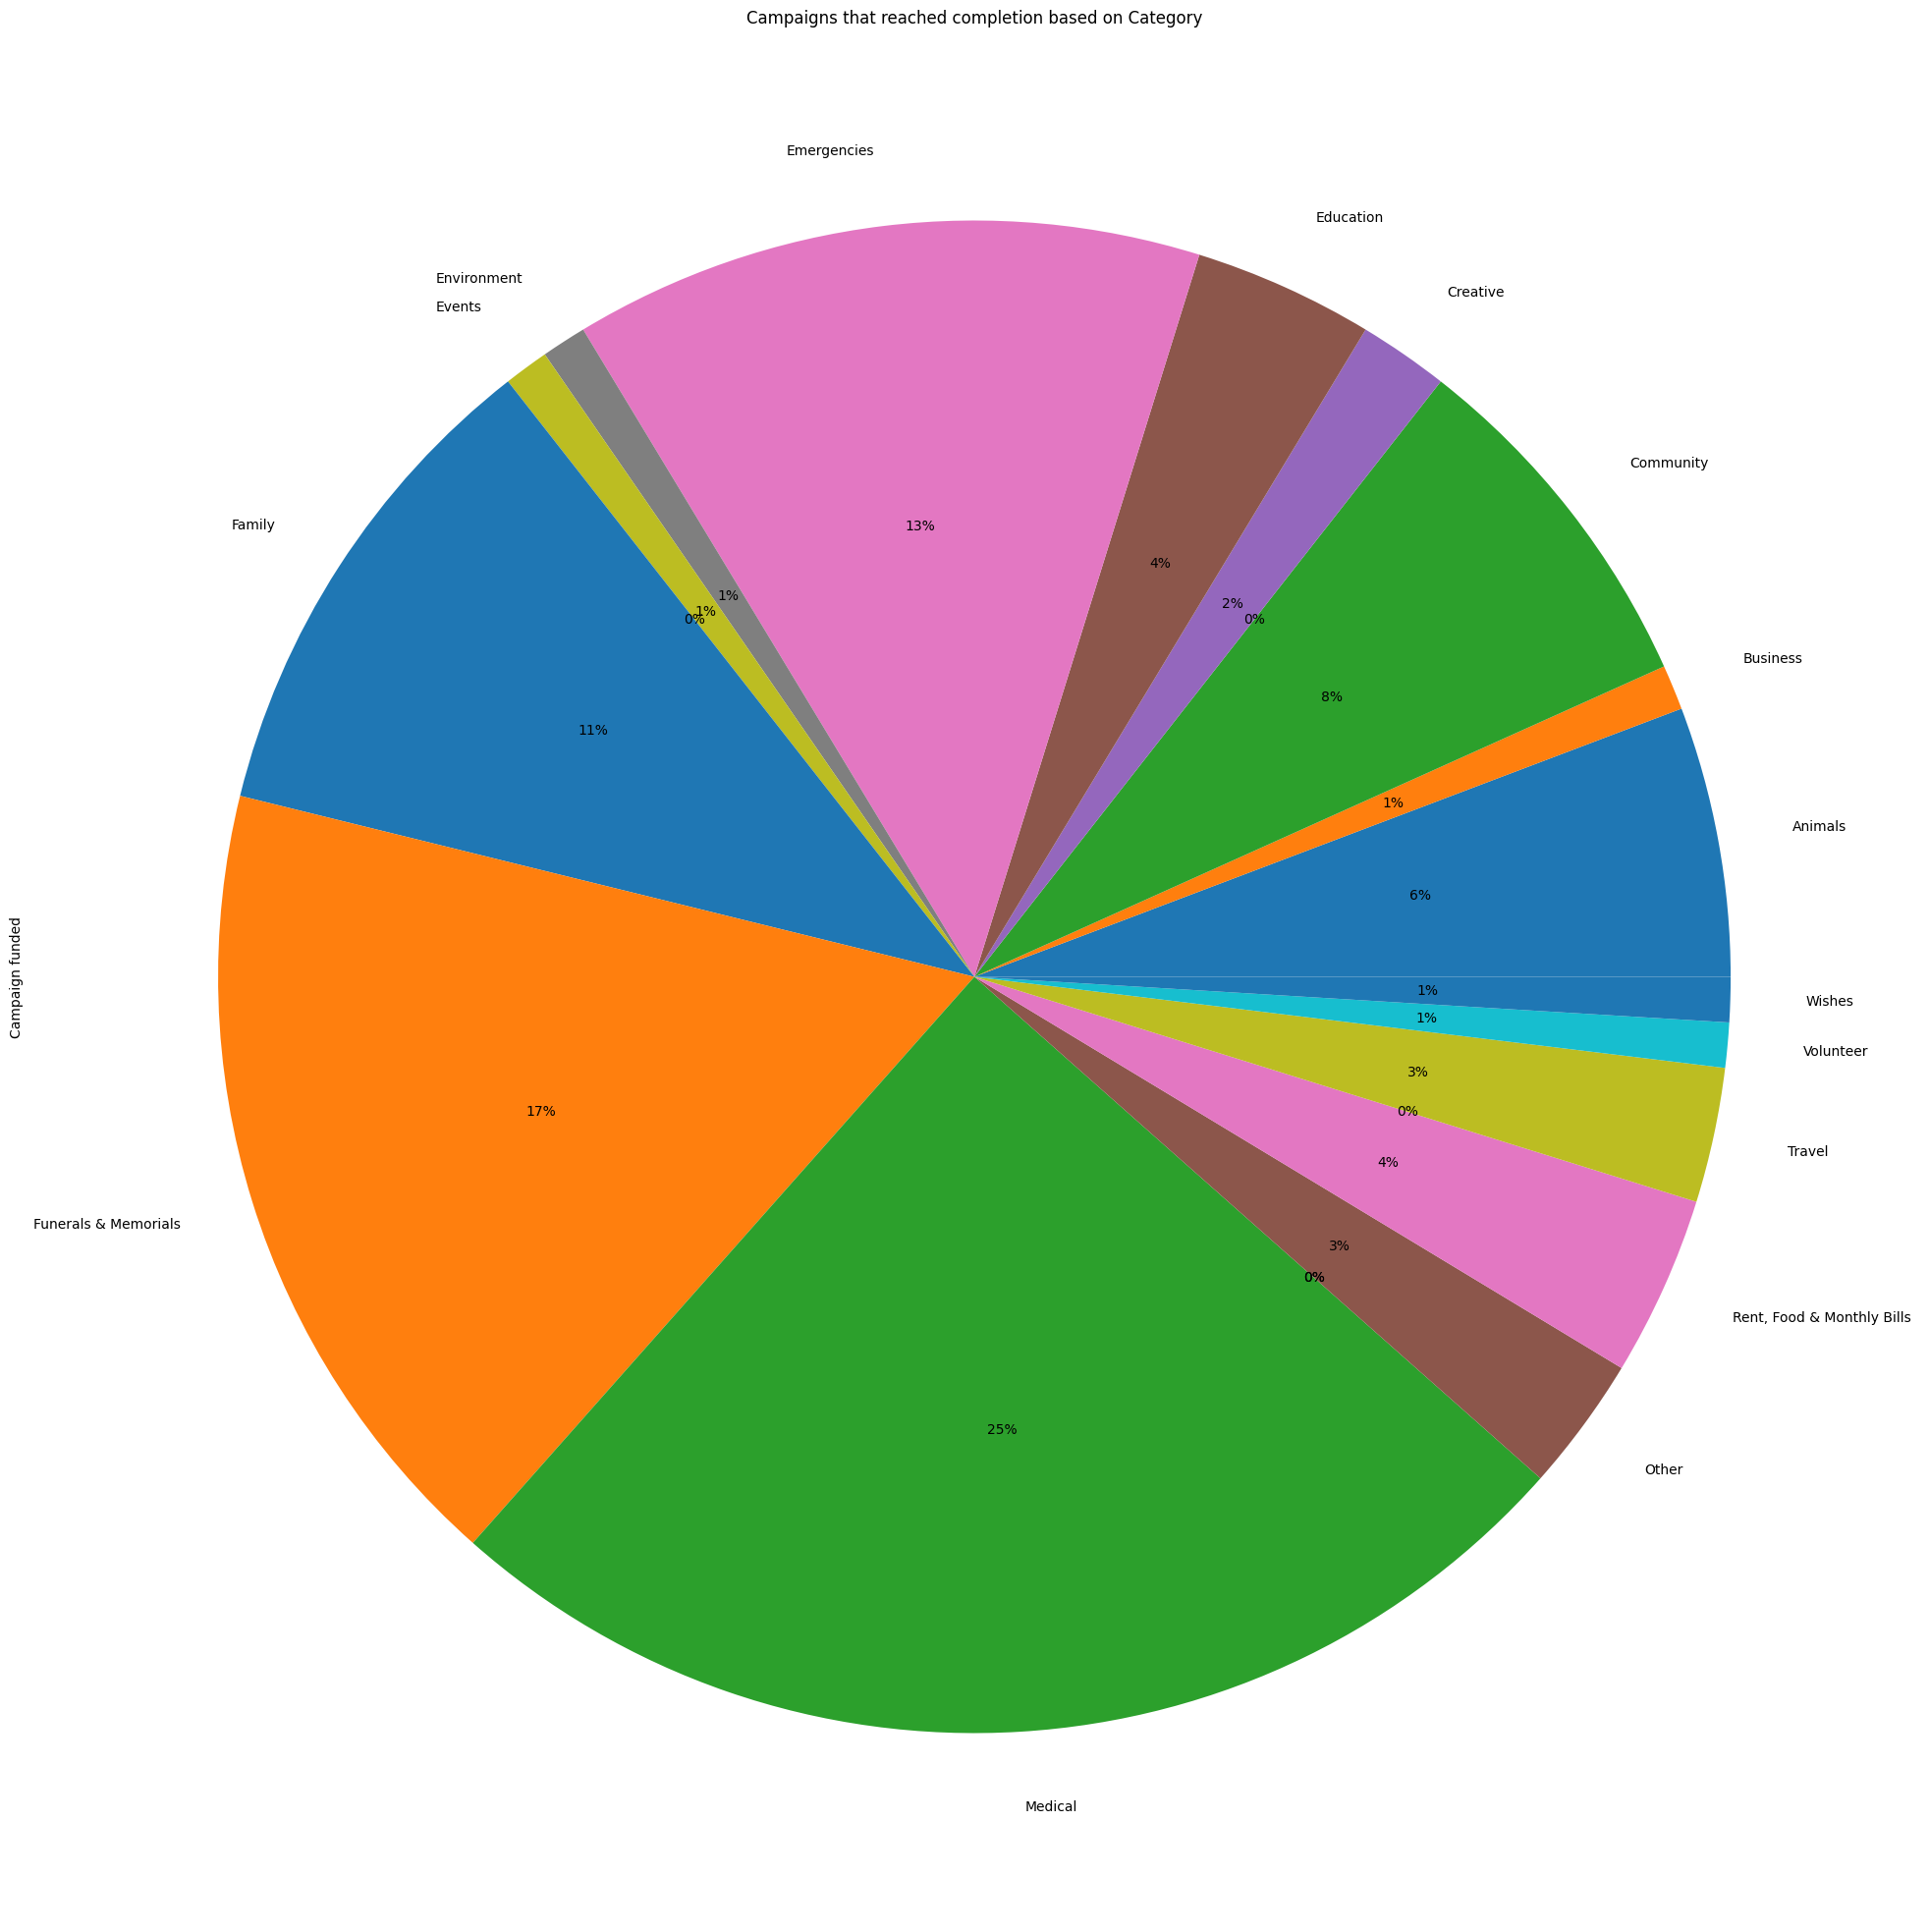

In [185]:
plt.figure(figsize=(25,25))
campaigns_df.groupby('Category')['Campaign funded'].sum().plot(kind='pie', autopct='%1.0f%%', title = 'Campaigns that reached completion based on Category')

- What is the correlation between the number of Donators and the success of a campaign?

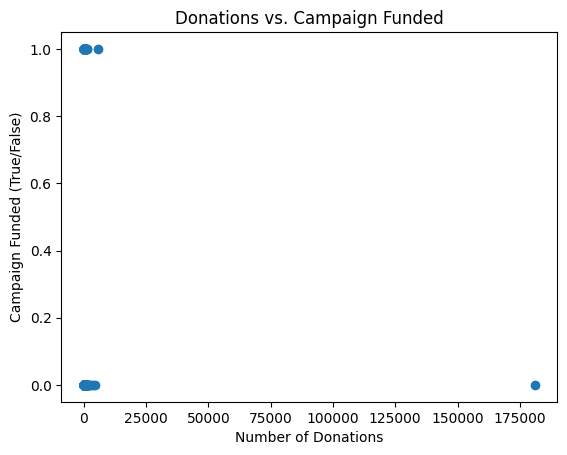

In [187]:
#To answer this question, illustrate with two scatterplots:

#scatterplot to compare two variables: campaign funded and number of donations

plt.scatter(campaigns_df['Donations'], campaigns_df['Campaign funded'])
plt.xlabel('Number of Donations')
plt.ylabel('Campaign Funded (True/False)')
plt.title('Donations vs. Campaign Funded')
plt.show()

#0 indicates goal has not been reached, while 1 indicates goal was reached



In [188]:
#To double-check, use .corr function to calculate the correlation coefficient: 
correlation = campaigns_df['Donations'].corr(campaigns_df['Campaign funded'])

print(correlation)

-0.005514711217439537


There is a weak negative correlation between the number of donations and whether or not the campaign is funded or not. This could imply that the more donations involved in a campaign, indicate that there is higher the chance of success in completing the campaign. While fewer donations will imply there is a chance that the campaign will not be fully funded to the desired funding goal. 

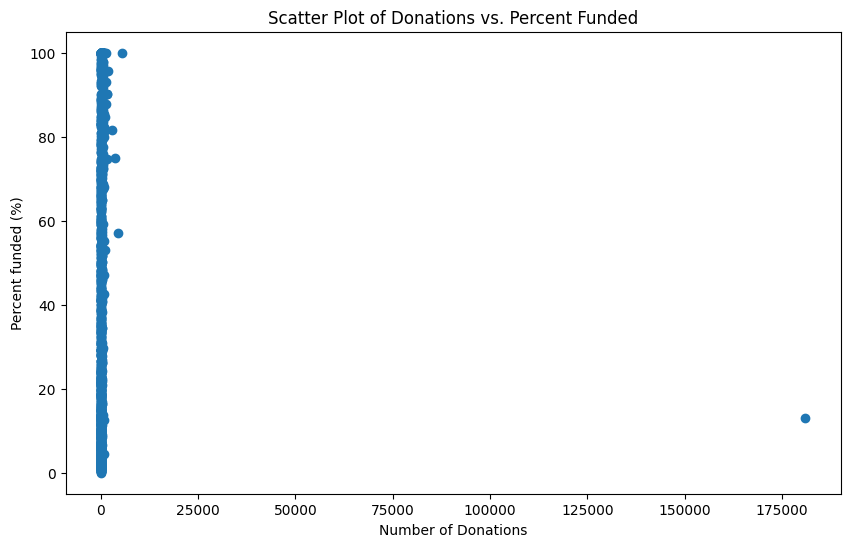

In [199]:
#scatterplot to compare two variables: percent funded and number of donations
plt.figure(figsize=(10,6))
plt.scatter(x= campaigns_df['Donations'], y=campaigns_df['Percent funded (%)'])
plt.xlabel('Number of Donations')
plt.ylabel('Percent funded (%)')

plt.title('Scatter Plot of Donations vs. Percent Funded')

plt.show()

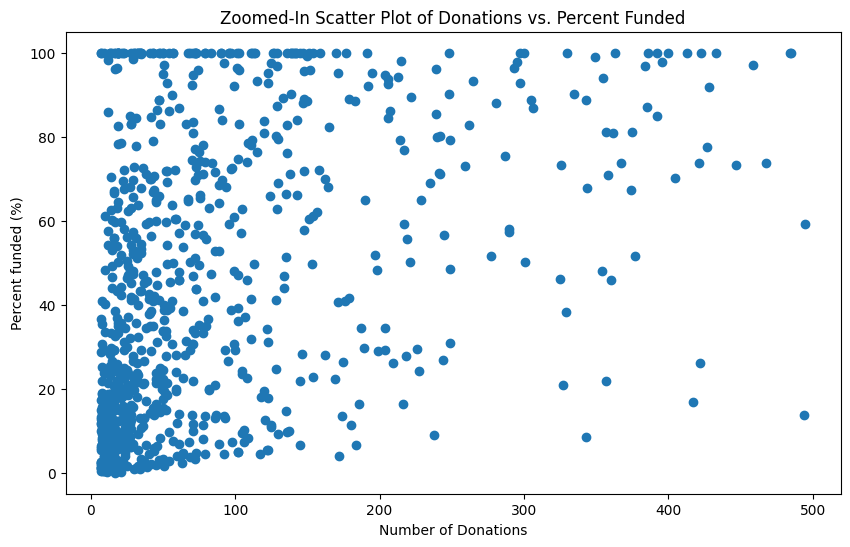

In [200]:
#We may need to zoom in and ignore the outliers here for now to see the complete trend: 

zoomed_df = campaigns_df[(campaigns_df['Donations'] < 500) & (campaigns_df['Percent funded (%)'] <= 100)] 

# Scatter plot with zoomed-in data

plt.figure(figsize=(10, 6))
plt.scatter(x=zoomed_df['Donations'], y=zoomed_df['Percent funded (%)'])
plt.xlabel('Number of Donations')
plt.ylabel('Percent funded (%)')
plt.title('Zoomed-In Scatter Plot of Donations vs. Percent Funded')
plt.show()


In [202]:
#To double check, use calculate the correlation coefficient: 
correlation = campaigns_df['Donations'].corr(campaigns_df['Percent funded (%)'])
print(correlation)

-0.016116835656215633


**Key observation:** The number of donors does not correlate with the success rate. This is because donors may donate a specific amount to their choosing. A single donator can donate more than 100 dollars compared to 10 donors who may pitch up to 50 dollars or less. 

- How does the goal amount affect the success rate of campaigns?

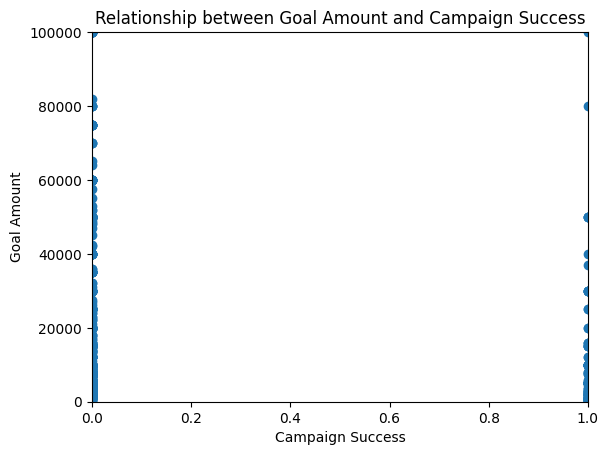

In [152]:
plt.ticklabel_format(useOffset=False)
plt.axis([0.0, 1.0, 0, 100000])

plt.scatter(x=campaigns_df['Campaign funded'],y=campaigns_df['Funding goal'])

plt.xlabel('Campaign Success')
plt.ylabel('Goal Amount')

plt.title('Relationship between Goal Amount and Campaign Success')

plt.show()

In [153]:
correlation = campaigns_df['Funding goal'].corr(campaigns_df['Campaign funded'])
print(correlation)

-0.04152795368459454


**Key observation**: A correlation close to 0 and negative in value implies a weak negative correlation. The larger the goal, the success rate of a campaign slightly decreases. There may be other factors involved, perhaps the time the campaign is hosted (date) or the category it belongs to. Based on previous observations, it could be that the more urgent categories such as family, funeral, medical, and education have a higher impact on donors to send money to, despite any possible goal amount the campaign host may set. 

In other words, campaigns in progress that did not reach their goals may have larger goal funding expectations than successful campaigns, however, this cannot be confirmed because of other factors including time, category, and how the algorithm targets and prioritizes which campaigns are worth looking at first.

In [154]:
#review correlations with other column variables: 
numeric_columns_campaigns_df = campaigns_df[['Money raised', 'Funding goal', 'Donations', 'Percent funded (%)', 'Campaign funded', 'Location']]
numeric_columns_campaigns_df.corr()

ValueError: could not convert string to float: 'O Caspi\nOrganizer\nBrooklyn, NY\nContact'

- think of date-time question